In [10]:
import os,sys
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
#plt.rcParams['font.family']='sans serif' #please remove this line if font is not installed
#plt.rcParams['font.sans-serif']='Arial' # please remove this line if Arial font is not installed
plt.rcParams['pdf.fonttype']=42
# sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap/"))
import PyComplexHeatmap as pch
print(pch.__version__)

import seaborn as sns
import matplotlib.pyplot as plt
import h5py
import scanpy as sc


1.8.2


In [11]:
adata_all = sc.read_h5ad('/home/junyichen/code/scmmd/output/atac0416/3REGIONS_gene.h5ad')


In [14]:
adata_all.obs.to_csv('/home/junyichen/code/scmmd/output/atac0416/ATACSC_3REGION_ALL_L1annoated.csv')

In [15]:
meta_atac = pd.read_csv('/home/junyichen/code/scmmd/output/atac0416/ATACSC_3REGION_ALL_L1annoated.csv', index_col=0)


In [107]:
adata_all.obs

,sample,leiden,leiden_tile,celltype.L1
MC37A_AMY:AAACGAAAGAGTGGAA-1,MC37A_AMY,5,5,Neuron
MC37A_AMY:AAACGAAAGGGTAGTC-1,MC37A_AMY,9,9,Immune
MC37A_AMY:AAACGAAGTACGGAGT-1,MC37A_AMY,1,1,Neuron
MC37A_AMY:AAACGAAGTCAGCAAG-1,MC37A_AMY,5,5,Neuron
MC37A_AMY:AAACGAAGTCCGAGCT-1,MC37A_AMY,2,2,Neuron
...,...,...,...,...
MW26A_PFC:TTTGTGTTCCGTACGG-1,MW26A_PFC,7,7,Neuron
MW26A_PFC:TTTGTGTTCCTATCAT-1,MW26A_PFC,0,0,Neuron
MW26A_PFC:TTTGTGTTCCTGACCT-1,MW26A_PFC,16,16,Neuron
MW26A_PFC:TTTGTGTTCGTAGCGC-1,MW26A_PFC,13,13,Neuron


In [54]:
import snapatac2 as snap

In [ ]:
snap.pl.umap(adata_all, color='sample',marker_size=3)

In [ ]:
meta_atac['Sample_name'] = meta_atac['sample']
meta_atac['Condition'] = meta_atac['Sample_name'].str[:2]
meta_atac['Region'] = meta_atac['Sample_name'].str.split('_').str[1]

In [44]:
meta_atac

,sample,leiden,leiden_tile,celltype.L1,Sample_name,Condition,Region
MC37A_AMY:AAACGAAAGAGTGGAA-1,MC37A_AMY,5,5,Neuron,MC37A_AMY,MC,AMY
MC37A_AMY:AAACGAAAGGGTAGTC-1,MC37A_AMY,9,9,Immune,MC37A_AMY,MC,AMY
MC37A_AMY:AAACGAAGTACGGAGT-1,MC37A_AMY,1,1,Neuron,MC37A_AMY,MC,AMY
MC37A_AMY:AAACGAAGTCAGCAAG-1,MC37A_AMY,5,5,Neuron,MC37A_AMY,MC,AMY
MC37A_AMY:AAACGAAGTCCGAGCT-1,MC37A_AMY,2,2,Neuron,MC37A_AMY,MC,AMY
...,...,...,...,...,...,...,...
MW26A_PFC:TTTGTGTTCCGTACGG-1,MW26A_PFC,7,7,Neuron,MW26A_PFC,MW,PFC
MW26A_PFC:TTTGTGTTCCTATCAT-1,MW26A_PFC,0,0,Neuron,MW26A_PFC,MW,PFC
MW26A_PFC:TTTGTGTTCCTGACCT-1,MW26A_PFC,16,16,Neuron,MW26A_PFC,MW,PFC
MW26A_PFC:TTTGTGTTCGTAGCGC-1,MW26A_PFC,13,13,Neuron,MW26A_PFC,MW,PFC


Starting plotting HeatmapAnnotations


/tmp/ipykernel_3005488/1214558333.py:5: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


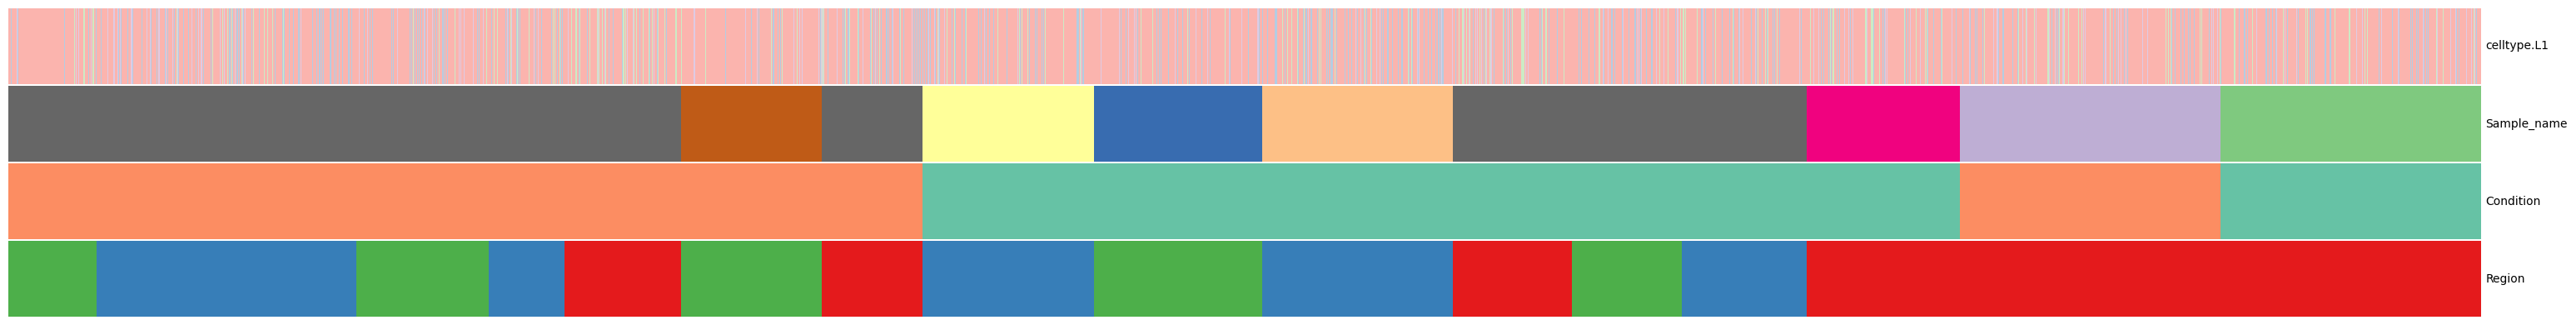

In [21]:
plt.figure(figsize=(30, 4))
col_ha = pch.HeatmapAnnotation(df=meta_atac.loc[:,['celltype.L1','Sample_name','Condition','Region']],
                               cmap ={'celltype.L1':'Pastel1','Sample_name':'Accent','Condition':'Set2','Region':'Set1'},
                               plot=True,legend=False,legend_gap=0,hgap=0.5,axis=1)
plt.tight_layout()
plt.show()


In [22]:
meta_atac.columns

Index(['sample', 'leiden', 'leiden_tile', 'celltype.L1', 'Sample_name',
       'Condition', 'Region'],
      dtype='object')

In [41]:
meta_atac.sort_values('Region')['sample'].unique()

array(['MC37A_AMY', 'MC52E_AMY', 'MW47A_AMY', 'MC50B_AMY', 'MW51A_AMY',
       'MW47A_HIP', 'MC39C_HIP', 'MC48D_HIP', 'MW51A_HIP', 'MC50B_HIP',
       'MW45A_HIP', 'MW26A_PFC', 'MC25A_PFC', 'MW47A_PFC', 'MC52E_PFC',
       'MC50B_PFC', 'MW51A_PFC'], dtype=object)

In [65]:
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

/tmp/ipykernel_3005488/2080708843.py:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Celltype Proportions per Sample'}, xlabel='sample', ylabel='Proportion (%)'>)

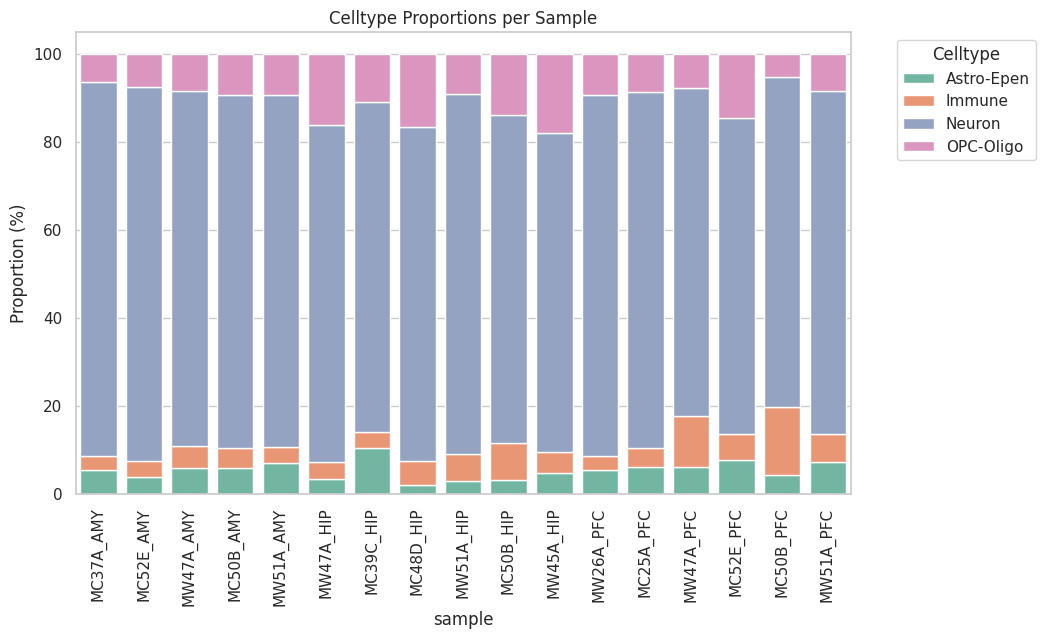

In [68]:
def plot_stack_prop(df,x=None, y='proportion',pro_col='celltype.L1',color_palette=sns.color_palette("Set2"), figsize=(10, 6),x_order=None, **kwargs):
    counts = df.groupby([x, pro_col]).size().unstack(fill_value=0)
    # If x_order is provided, sort the index of counts
    if x_order is not None:
        counts = counts.loc[x_order]
    df_prop = counts.div(counts.sum(axis=1), axis=0) * 100
    df_prop = df_prop.reset_index().melt(id_vars=x, var_name=pro_col, value_name=y)
    fig, ax = plt.subplots(figsize=figsize)
    sns.set(style="whitegrid")
    # Initialize bottom positions for stacking
        # Sort the dataframe by the specified order by the column of sample name
    bottom = pd.Series([0] * len(df_prop[x].unique()), index=df_prop[x].unique())
    # Plot each celltype layer
    for i, celltype in enumerate(df_prop[pro_col].unique()):
        subset = df_prop[df_prop[pro_col] == celltype]
        sns.barplot(
            x=x, y=y, data=subset,
            label=celltype, bottom=bottom[subset[x]],
            color=color_palette[i]
        )
        bottom += subset.set_index(x)[y].reindex(bottom.index, fill_value=0)
    ax.set_title('Celltype Proportions per Sample')
    ax.set_ylabel('Proportion (%)')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.legend(title='Celltype', bbox_to_anchor=(1.05, 1))
    return fig,ax

order = meta_atac.sort_values('Region')['sample'].unique()
plot_stack_prop(meta_atac,x='sample', y='proportion',x_order=order, figsize=(10, 6))

In [76]:
df_marker = pd.read_excel("/data2st1/junyi/output/atac0416/20250423maker list.xlsx")

In [154]:
df_all_meta = pd.DataFrame()

for region in meta_atac['Region'].unique():
    df_neu = pd.read_csv(f'/data2st1/junyi/output/atac0416/ATACSC_{region}_Neuron_L2annoated.csv', index_col=0)  

    df_region_marker = df_marker[df_marker['region'] == region]

    if region == 'PFC':
        df_neu['celltype.L2'] = "PFC " + df_neu['celltype.L2']
 
    df_neu_merge = df_neu.merge(df_region_marker, left_on='celltype.L2',right_on='celltype.L2', how='left')
    df_neu_merge.index = df_neu.index

    
    if len(df_all_meta) > 0:
        df_all_meta = pd.concat([df_all_meta, df_neu_merge], axis=0)
    else:
        df_all_meta = df_neu_merge

df_all_meta.index = df_all_meta.index.str.replace('_query', '')

In [155]:
df_all_meta

,sample,leiden,celltype.L2,batch,n_genes,region,Neurotransmitter_celltype,celltype.L1,marker
MC37A_AMY:AAACGAAAGAGTGGAA-1,MC37A_AMY,1,AMY Meis1 Glut,query,8813.0,AMY,Glutamatergic,Glutamatergic Neuron,Meis1
MC37A_AMY:AAACGAAGTACGGAGT-1,MC37A_AMY,4,AMY Egfr GABA,query,5565.0,AMY,GABAergic,GABAergic Neuron,Egfr
MC37A_AMY:AAACGAAGTCAGCAAG-1,MC37A_AMY,9,AMY Gad2 GABA,query,9453.0,AMY,GABAergic,GABAergic Neuron,Gad2
MC37A_AMY:AAACGAAGTCCGAGCT-1,MC37A_AMY,1,AMY Slc17a6 Glut,query,5961.0,AMY,Glutamatergic,Glutamatergic Neuron,Slc17a6
MC37A_AMY:AAACGAAGTTGGCTAT-1,MC37A_AMY,2,AMY Slc17a6 Glut,query,6441.0,AMY,Glutamatergic,Glutamatergic Neuron,Slc17a6
...,...,...,...,...,...,...,...,...,...
MW26A_PFC:TTTGTGTTCCGTACGG-1,MW26A_PFC,17,PFC L2/3 IT,query,7664.0,PFC,Glutamatergic,Glutamatergic Neuron,Slc30a3 Otof Cux2
MW26A_PFC:TTTGTGTTCCTATCAT-1,MW26A_PFC,1,PFC L4/5 IT,query,6059.0,PFC,Glutamatergic,Glutamatergic Neuron,Slc30a3 Rorb
MW26A_PFC:TTTGTGTTCCTGACCT-1,MW26A_PFC,14,PFC Doublet,query,10905.0,NaN,NaN,NaN,NaN
MW26A_PFC:TTTGTGTTCGTAGCGC-1,MW26A_PFC,7,PFC L2/3 IT,query,3572.0,PFC,Glutamatergic,Glutamatergic Neuron,Slc30a3 Otof Cux2


In [166]:
adata_all.obs['celltype.L2']=adata_all.obs['celltype.L1'].astype(str)
adata_all.obs['region'] = adata_all.obs['sample'].str.split('_').str[1]
adata_all.obs['Neurotransmitter_celltype'] = 'NN'


In [194]:
adata_all.obs.loc[df_all_meta.index,'celltype.L2'] = df_all_meta['celltype.L2'].astype(str)

adata_all.obs.loc[df_all_meta.index,'Neurotransmitter_celltype'] = df_all_meta['Neurotransmitter_celltype'].astype(str)

adata_all.obs['region_nt'] = adata_all.obs['region'].astype(str) +"_"+ adata_all.obs['Neurotransmitter_celltype'].str[:4].astype(str)
adata_all.obs.loc[adata_all.obs['region_nt'].str.contains('NN'),'region_nt'] = "NN"
adata_all.obs.loc[adata_all.obs['region_nt'].str.contains('nan'),'region_nt'] = np.nan

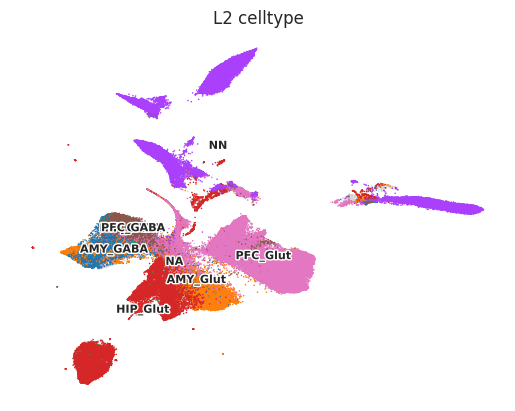

In [ ]:
sc.pl.umap(adata_all, color=['region_nt'], size=5, legend_fontsize=8, title='L2 celltype', frameon=False, show=True,legend_loc='on data', 
           legend_fontoutline=2,save='01_umap_3region.svg',)

In [203]:
adata_all.obs.to_csv('/home/junyichen/code/scmmd/output/atac0416/ATACSC_3REGION_ALL_L2annoated.csv')

/tmp/ipykernel_3005488/2080708843.py:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipykernel_3005488/2080708843.py:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/tmp/ipykernel_3005488/2080708843.py:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



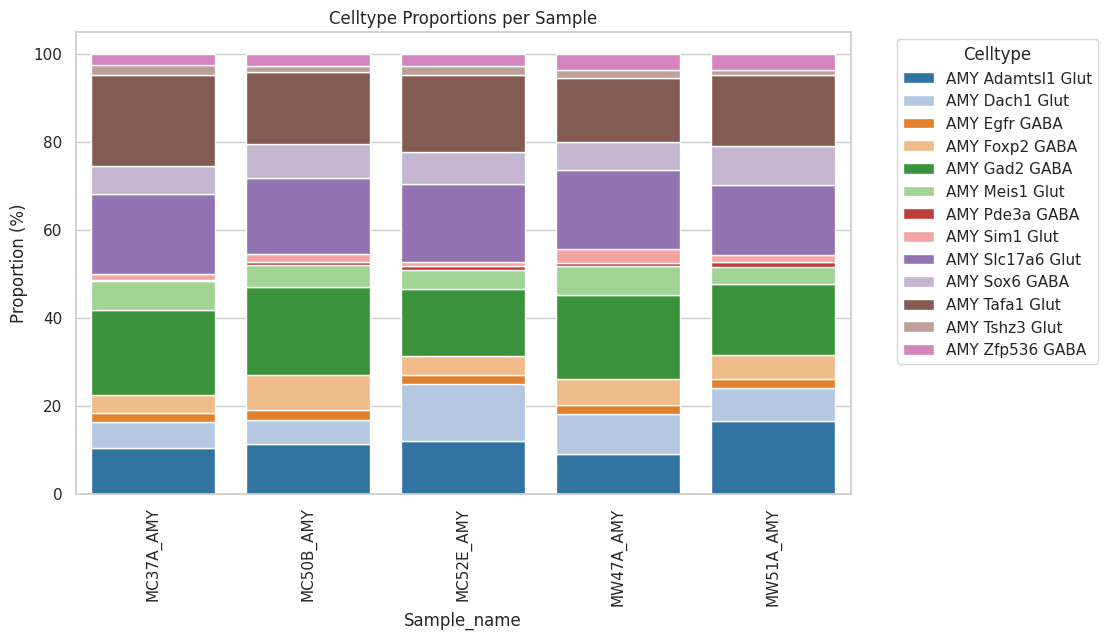

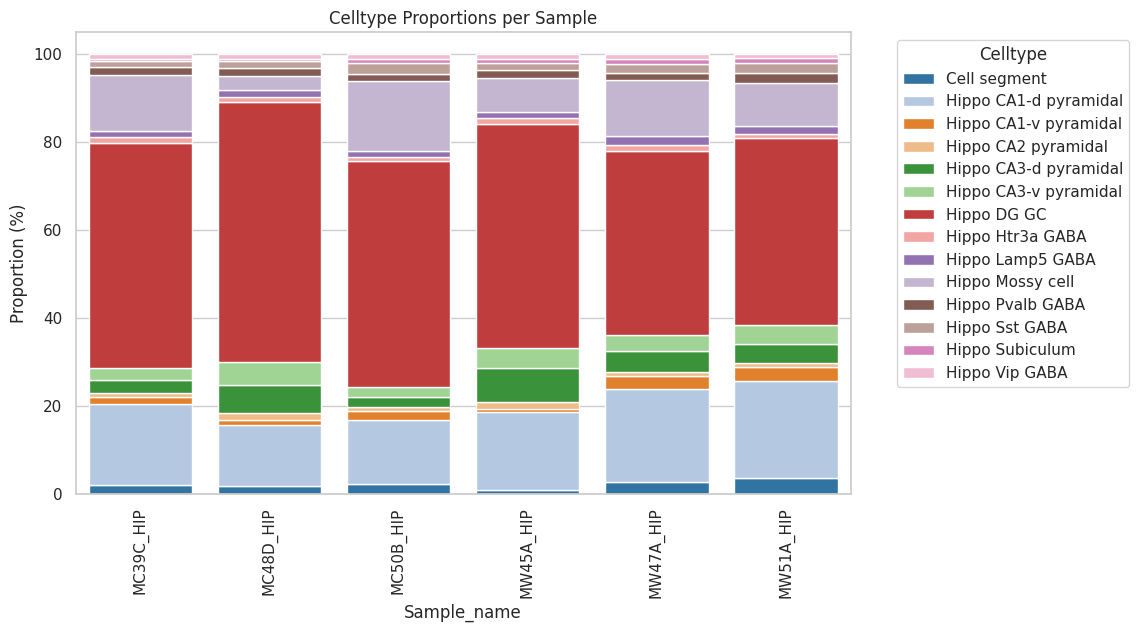

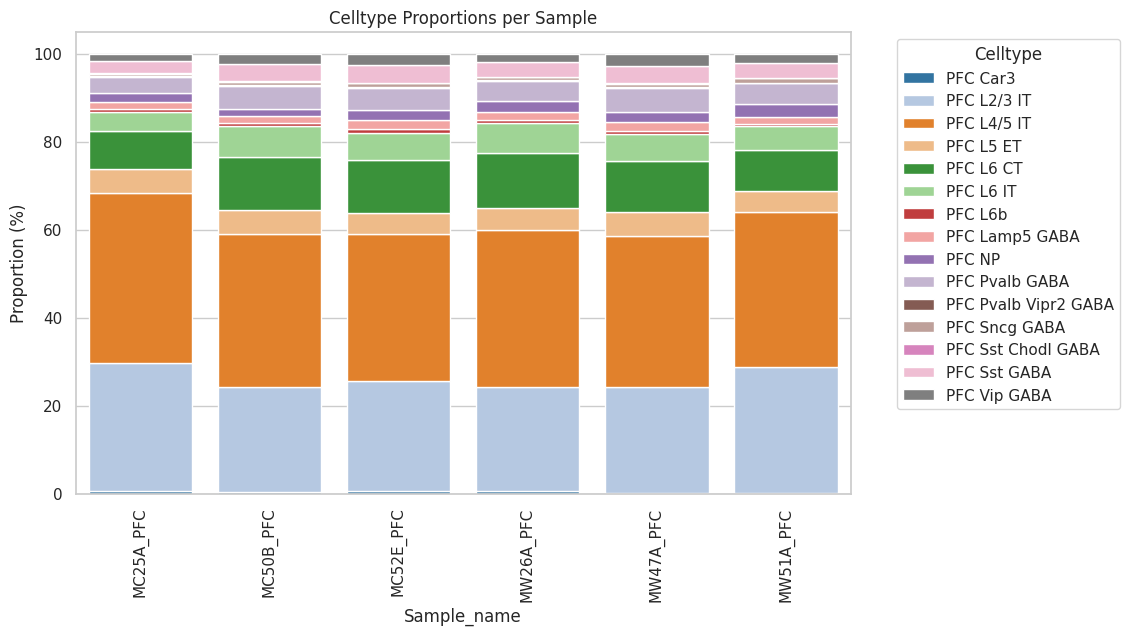

In [197]:
df_neurons = pd.DataFrame()
for region in meta_atac['Region'].unique():
    df_neuron = pd.read_csv(f'/data2st1/junyi/output/atac0416/ATACSC_{region}_Neuron_L2annoated.csv', index_col=0)  
    df_neuron = df_neuron[~df_neuron['celltype.L2'].isin(['Doublet','Not sure'])]
    df_neuron['Sample_name'] = df_neuron['sample']
    df_neuron['Condition'] = df_neuron['Sample_name'].str[:2]
    df_neuron['Region'] = df_neuron['Sample_name'].str.split('_').str[1]
    df_region_marker = df_marker[df_marker['region'] == region]

    if region == 'PFC':
        df_neuron['celltype.L2'] = "PFC " + df_neuron['celltype.L2']
 
    df_neuron = df_neuron.merge(df_region_marker, left_on='celltype.L2',right_on='celltype.L2', how='left')

    plot_stack_prop(df_neuron,x='Sample_name', y='proportion',pro_col='celltype.L2',color_palette=sns.color_palette('tab20'), figsize=(10, 6))

    if len(df_region_marker) > 0:
        df_neurons = pd.concat([df_neurons, df_neuron], axis=0)
    else:
        df_neuron = df_neuron

/tmp/ipykernel_3005488/2080708843.py:24: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



(<Figure size 1000x600 with 1 Axes>,
 <Axes: title={'center': 'Celltype Proportions per Sample'}, xlabel='sample', ylabel='Proportion (%)'>)

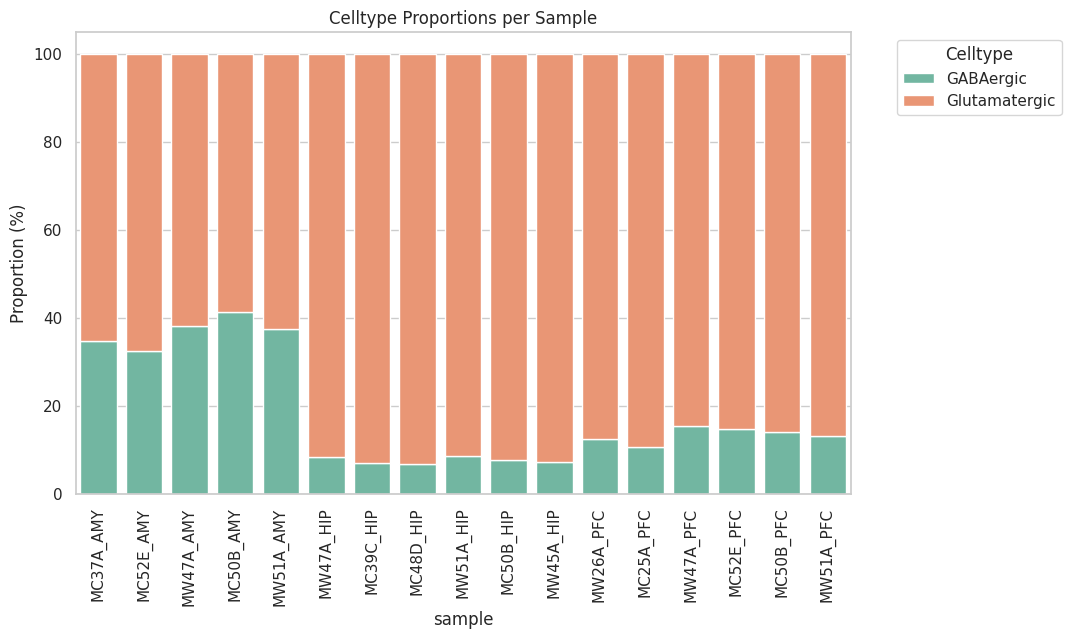

In [92]:

plot_stack_prop(df_neurons,x='sample', y='proportion',pro_col='Neurotransmitter_celltype',x_order=order, figsize=(10, 6))


In [108]:
df_neurons

,sample,leiden,celltype.L2,batch,n_genes,Sample_name,Condition,Region,region,Neurotransmitter_celltype,celltype.L1,marker
0,MC37A_AMY,1,AMY Meis1 Glut,query,8813.0,MC37A_AMY,MC,AMY,AMY,Glutamatergic,Glutamatergic Neuron,Meis1
1,MC37A_AMY,4,AMY Egfr GABA,query,5565.0,MC37A_AMY,MC,AMY,AMY,GABAergic,GABAergic Neuron,Egfr
2,MC37A_AMY,9,AMY Gad2 GABA,query,9453.0,MC37A_AMY,MC,AMY,AMY,GABAergic,GABAergic Neuron,Gad2
3,MC37A_AMY,1,AMY Slc17a6 Glut,query,5961.0,MC37A_AMY,MC,AMY,AMY,Glutamatergic,Glutamatergic Neuron,Slc17a6
4,MC37A_AMY,2,AMY Slc17a6 Glut,query,6441.0,MC37A_AMY,MC,AMY,AMY,Glutamatergic,Glutamatergic Neuron,Slc17a6
...,...,...,...,...,...,...,...,...,...,...,...,...
55130,MW26A_PFC,3,PFC L6 CT,query,7772.0,MW26A_PFC,MW,PFC,PFC,Glutamatergic,Glutamatergic Neuron,Foxp2
55131,MW26A_PFC,5,PFC L5 ET,query,11309.0,MW26A_PFC,MW,PFC,PFC,Glutamatergic,Glutamatergic Neuron,Fam84b Bcl6
55132,MW26A_PFC,17,PFC L2/3 IT,query,7664.0,MW26A_PFC,MW,PFC,PFC,Glutamatergic,Glutamatergic Neuron,Slc30a3 Otof Cux2
55133,MW26A_PFC,1,PFC L4/5 IT,query,6059.0,MW26A_PFC,MW,PFC,PFC,Glutamatergic,Glutamatergic Neuron,Slc30a3 Rorb


Starting plotting HeatmapAnnotations


/tmp/ipykernel_3005488/3349096252.py:5: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



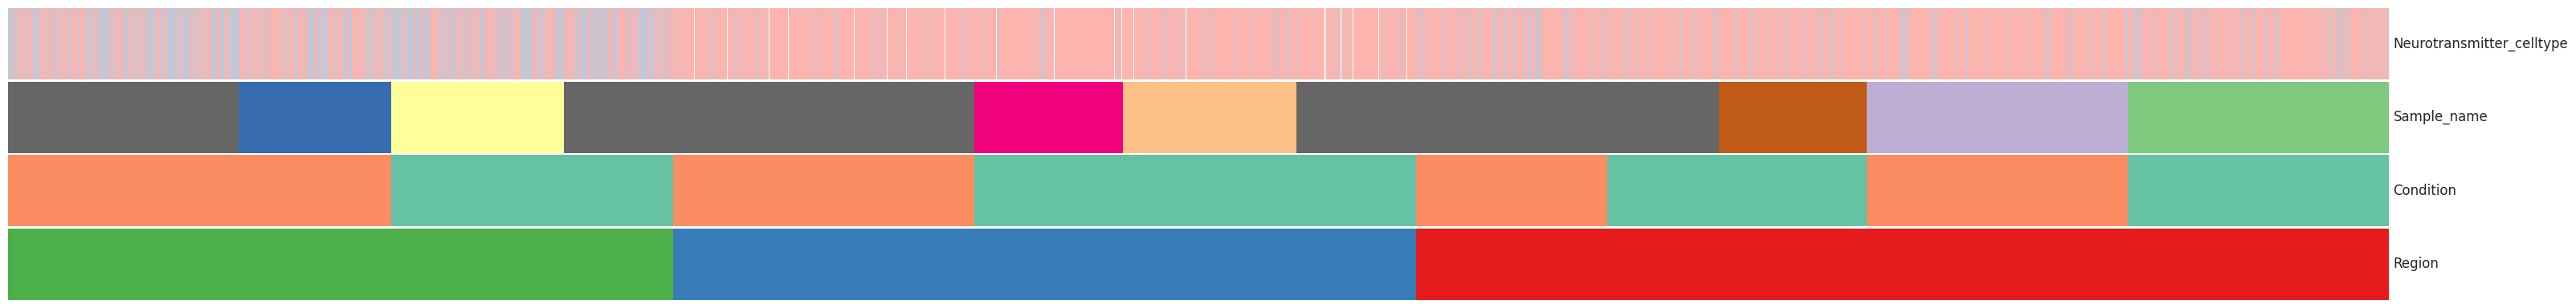

In [106]:
plt.figure(figsize=(30, 4))
col_ha = pch.HeatmapAnnotation(df=df_neurons.loc[:,['Neurotransmitter_celltype','Sample_name','Condition','Region']],
                               cmap ={'Neurotransmitter_celltype':'Pastel1','Sample_name':'Accent','Condition':'Set2','Region':'Set1'},
                               plot=True,legend=False,legend_gap=0,hgap=0.5,axis=1)
plt.tight_layout()
plt.show()
